by
#### Bernardo Vimpi
###### May 2020

#### HOT vs COLD CEREAL: Sodium 

#### PROJECT DESCRIPTION AND SCOPE

This project aims at evaluating the sodium content for hot and cold cereals. In doing so, we employ the T-Test and QQ-PLot along with Histogram to evaluate the normality (normal distribution) of the sodium levels for both Hot and Cold cereals. First we import the labraries needed for this projec. Second, we explore the data via display and statistical distributionand probability distribution. Then we perform the T-Test and display the data of Hot and Cold Sereal, in respect to sodium levels, using histogram.  

In [1]:
import pandas as pd
from scipy.stats import ttest_ind # for t-test
from scipy.stats import probplot # this is for qqplot
import matplotlib.pyplot as plt # also for qqplot
import pylab

#### DATA IMPORT AND READ

In [2]:
data = pd.read_csv ('cereal.csv')

In [3]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
data.columns# to display the columns names.

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [5]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


#### DATA DISTRIBUTION

One of the first steps here is to check if the data is normally distributed. In doing so, we use the Q-Q plot which, in statistics, is a probability plot which is graphical method for comparing two probability distributions by plotting their quatiles against each other. 

In our case, we'll use the Q-Q Plot to check normality of distribution. If we find that the variables are normally distributed, we should also expect to see most of the points along the center. 

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

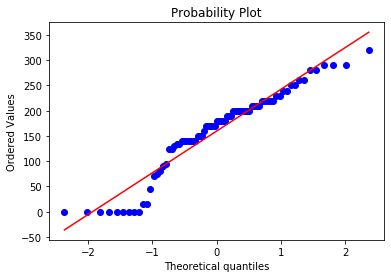

In [6]:
probplot (data["sodium"], dist ="norm", plot= pylab)

The above plot shows that the data is normally distributed.

### T-TEST



In the cereal dataset, we have the "Type" column. The "C" stands for Colde Cereal while the "H" stands for Hot. In so doing, we'll evaluate and calculate the t-test of the Hot and Cold cereals in respect to the "sodium" variable.

In [7]:
# Lets evaluate the sodium for two differet types of cereal: Hot and Cold

hotcereals =data["sodium"][data["type"]== "H"]

coldcereals = data["sodium"][data["type"]=="C"]

# Now lets compare both Hot and Cold Cereals using t-test

ttest_ind(hotcereals, coldcereals, equal_var=False)



Ttest_indResult(statistic=-4.896357618932593, pvalue=0.02411482081945822)

Thus, if we had decided to set the alpha  (which is the highest p-value that would still allow us to reject the null) to lets say 0.05 beforehand, we would the reject the null hypothesis. Statistics is the actual value of the t-test, while the pvalue is refers to the probability that we saw a difference that is large wbtewen our two groups (hot and cold cereals) just due to the chance is there were actually drawn from the same population. 

#### STATISTICS

In [8]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [9]:
# lets display and analyse the means of Hot Cereal and Cold Cereal
print("The Mean sodium for the hot cereals is:")
print(hotcereals.mean())

print("The Mean sodium for the cold cereals is:")
print(coldcereals.mean())


The Mean sodium for the hot cereals is:
26.666666666666668
The Mean sodium for the cold cereals is:
165.06756756756758


##### HISTOGRAM: HOT vs Cold Cereal 

Here we plot the histogram for both hot and cold cereal  types using matplotlib.

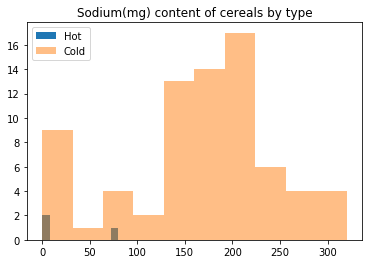

In [10]:
#lets plot the hot cereals
plt.hist(hotcereals, label ='Hot')
#lets plot the cold cereals
plt.hist(coldcereals, alpha =0.5, label ='Cold')

#lets now add a title and legend to the histogram
plt.title("Sodium(mg) content of cereals by type")
plt.legend(loc='upper left')

Thank you

by 

#### Bernardo Vimpi

May 2020